# Коршунова Полина Юрьевна НММбд-01-22

## 1. Табличные данные и Pandas

### 1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

    Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('/Users/polinakorshunova/Downloads/chipotle.tsv', sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


 Таблица сосотоит из 4622 строк и 6 столбцов. Данные представляют собой сведения о заказах: название позиции, цена, количество, id заказа, описание позиции

Вывожу последние 10 строк:

In [26]:
last_10_rows = df.tail(10)
print(last_10_rows)


      order_id  quantity            item_name  \
4612      1831         1        Carnitas Bowl   
4613      1831         1                Chips   
4614      1831         1        Bottled Water   
4615      1832         1   Chicken Soft Tacos   
4616      1832         1  Chips and Guacamole   
4617      1833         1        Steak Burrito   
4618      1833         1        Steak Burrito   
4619      1834         1   Chicken Salad Bowl   
4620      1834         1   Chicken Salad Bowl   
4621      1834         1   Chicken Salad Bowl   

                                     choice_description item_price  
4612  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...     $9.25   
4613                                                NaN     $2.15   
4614                                                NaN     $1.50   
4615   [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]     $8.75   
4616                                                NaN     $4.45   
4617  [Fresh Tomato Salsa, [Rice, Black Beans,

### 2.  Ответы на вопросы:

1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [27]:
total_orders = df['order_id'].nunique()
print("Количество заказов в выборке:", total_orders)

unique_items = df['item_name'].nunique()
print("Количество уникальных категорий товара:", unique_items)


Количество заказов в выборке: 1834
Количество уникальных категорий товара: 50


### 3. Есть ли в данных пропуски? В каких колонках?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


В даннах есть пропуски только в столбце choice_description

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [29]:
df = df.fillna(' ')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 4. Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

In [30]:
df['item_price_float'] = df['item_price'].apply(lambda s: float(s.strip()[1:]))
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


Колонка была строкой (object). В новой колонке цена будет числом (float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  4622 non-null   object 
 4   item_price          4622 non-null   object 
 5   item_price_float    4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


Какая средняя/минимальная/максимальная цена у товара? 


In [32]:
print("Средняя цена товара: ", '%.2f' % (df['item_price_float']/df['quantity']).mean())
print("Минимальная цена товара: ", (df['item_price_float']/df['quantity']).min())
print("Максимальная цена товара: ", (df['item_price_float']/df['quantity']).max())

Средняя цена товара:  7.08
Минимальная цена товара:  1.09
Максимальная цена товара:  11.89


Удалите старую колонку с ценой.


In [33]:
df_dropped = df.drop(labels = 'item_price', axis = 1)
df_dropped

,order_id,quantity,item_name,choice_description,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 5. Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

In [35]:
df_no_duplicates = df_dropped.drop_duplicates('item_name')
df_no_duplicates.head()

,order_id,quantity,item_name,choice_description,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [36]:
df_no_duplicates['singular_item_price'] = df_no_duplicates['item_price_float'] / df_no_duplicates['quantity']
df_no_duplicates.head()

,order_id,quantity,item_name,choice_description,item_price_float,singular_item_price
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49


In [37]:
df_sorted = df_no_duplicates.sort_values('singular_item_price', axis=0)
df_sorted.head()

,order_id,quantity,item_name,choice_description,item_price_float,singular_item_price
34,17,1,Bottled Water,,1.09,1.09
18,9,2,Canned Soda,[Sprite],2.18,1.09
263,114,1,Canned Soft Drink,[Coke],1.25,1.25
6,3,1,Side of Chips,,1.69,1.69
40,19,1,Chips,,2.15,2.15


 5 самых дешёвых товаров

In [38]:
df_sorted[['item_name', 'choice_description', 'singular_item_price']].head()

,item_name,choice_description,singular_item_price
34,Bottled Water,,1.09
18,Canned Soda,[Sprite],1.09
263,Canned Soft Drink,[Coke],1.25
6,Side of Chips,,1.69
40,Chips,,2.15


 5 самых дорогих товаров

In [39]:
df_sorted[['item_name', 'choice_description', 'singular_item_price']].tail()

,item_name,choice_description,singular_item_price
7,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
168,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75
1132,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89
1229,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89
281,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",11.89


### 6. Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?


In [41]:
print("Клиенты покупали Chicken Bowl", \
      len(df[(df['quantity'] > 1) & (df['item_name'] == 'Chicken Bowl')]), "раза")

Клиенты покупали Chicken Bowl 33 раза


### 7. Какой средний чек у заказа? Сколько в среднем товаров покупают?


In [43]:
print("Средний чек у заказа:", '%.2f' % (df.groupby(by='order_id')['item_price_float'].sum()).mean(), "$")

Средний чек у заказа: 18.81 $


In [44]:
print("В среднем покупают", '%.2f' % (df.groupby(by='order_id')['quantity'].sum()).mean(), "товаров")

В среднем покупают 2.71 товаров


### 8. Сколько заказов содержали ровно 1 товар?

In [45]:
print((df.groupby(by='order_id')['quantity'].sum() == 1).sum(), "заказов содержали ровно 1 товар")

56 заказов содержали ровно 1 товар


### 9. Какая самая популярная категория товара? 

In [46]:
df_pop = df.groupby(by='item_name')['quantity'].sum()
df_pop_sorted = df_pop.sort_values(ascending=False)
df_pop_sorted.nlargest(10)

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

Chicken Bowl - самая популярная категория товара

### 10. Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?  

In [47]:
df['is_burrito'] = df['item_name'].apply(lambda s: "Burrito" in s)
df.tail()

,order_id,quantity,item_name,choice_description,item_price,item_price_float,is_burrito
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,True
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,True
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,False
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,False
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75,8.75,False


In [48]:
df_no_duplicates = df.drop_duplicates('item_name')
df_burrito_no_duplicates = df_no_duplicates[df_no_duplicates['is_burrito'] == True]
df_burrito_no_duplicates

,order_id,quantity,item_name,choice_description,item_price,item_price_float,is_burrito
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75,True
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49,8.49,True
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$8.99,8.99,True
27,14,1,Carnitas Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",$8.99,8.99,True
57,26,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.25,11.25,True
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",$7.40,7.40,True


In [49]:
df_burrito = df[df['is_burrito'] == True]
df_burrito

,order_id,quantity,item_name,choice_description,item_price,item_price_float,is_burrito
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75,True
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25,9.25,True
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49,8.49,True
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49,8.49,True
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",$8.99,8.99,True
...,...,...,...,...,...,...,...
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.25,11.25,True
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,True
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",$11.25,11.25,True
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,True


In [50]:
(df_burrito.groupby(by='item_name')['quantity'].sum()).sort_values(ascending=False)

item_name
Chicken Burrito     591
Steak Burrito       386
Veggie Burrito       97
Barbacoa Burrito     91
Carnitas Burrito     60
Burrito               6
Name: quantity, dtype: int64

In [51]:
df_burrito.sort_values('item_price_float', axis=0)

,order_id,quantity,item_name,choice_description,item_price,item_price_float,is_burrito
760,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",$7.40,7.40,True
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",$7.40,7.40,True
511,214,1,Burrito,"[Braised Barbacoa, Vegetarian Black Beans, [So...",$7.40,7.40,True
519,217,1,Burrito,"[Braised Barbacoa, Pinto Beans, [Sour Cream, S...",$7.40,7.40,True
759,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",$7.40,7.40,True
...,...,...,...,...,...,...,...
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$27.75,27.75,True
1255,511,3,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$27.75,27.75,True
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$33.75,33.75,True
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$35.00,35.00,True


Существуют всего 6 видов буритто: Steak, Chicken, Barbacoa, Carnitas, Veggie, просто Burrito. Чаще всего покупают Chicken Burrito. Самый дорогой вид буритто - это Steak Burrito




### 11. В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

In [54]:
df['check_sum'] = df.groupby('order_id')['item_price_float'].transform(lambda p: p.sum()) 
df.head(10)

,order_id,quantity,item_name,choice_description,item_price,item_price_float,is_burrito,check_sum
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39,False,11.56
1,1,1,Izze,[Clementine],$3.39,3.39,False,11.56
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,False,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39,False,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,False,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98,False,12.67
6,3,1,Side of Chips,,$1.69,1.69,False,12.67
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75,True,21.00
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25,9.25,False,21.00
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25,9.25,True,13.70


In [55]:
df_short_ver = df.drop(labels = {'item_price', 'choice_description', 'is_burrito'}, axis = 1)
df_short_ver.head(5)

,order_id,quantity,item_name,item_price_float,check_sum
0,1,1,Chips and Fresh Tomato Salsa,2.39,11.56
1,1,1,Izze,3.39,11.56
2,1,1,Nantucket Nectar,3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39,11.56
4,2,2,Chicken Bowl,16.98,16.98


In [56]:
df_short_ver['singular_item_price'] = df['item_price_float'] / df['quantity']
df_short_ver.head(5)

,order_id,quantity,item_name,item_price_float,check_sum,singular_item_price
0,1,1,Chips and Fresh Tomato Salsa,2.39,11.56,2.39
1,1,1,Izze,3.39,11.56,3.39
2,1,1,Nantucket Nectar,3.39,11.56,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39,11.56,2.39
4,2,2,Chicken Bowl,16.98,16.98,8.49


In [57]:
df_short_ver['percentage'] = (df_short_ver['singular_item_price'] / df_short_ver['check_sum']) * 100
df_short_ver.head(5)

,order_id,quantity,item_name,item_price_float,check_sum,singular_item_price,percentage
0,1,1,Chips and Fresh Tomato Salsa,2.39,11.56,2.39,20.67474
1,1,1,Izze,3.39,11.56,3.39,29.32526
2,1,1,Nantucket Nectar,3.39,11.56,3.39,29.32526
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39,11.56,2.39,20.67474
4,2,2,Chicken Bowl,16.98,16.98,8.49,50.00000


In [58]:
df_short_ver['greater_than_40'] = df_short_ver['percentage'] > 40
df_short_ver

,order_id,quantity,item_name,item_price_float,check_sum,singular_item_price,percentage,greater_than_40
0,1,1,Chips and Fresh Tomato Salsa,2.39,11.56,2.39,20.674740,False
1,1,1,Izze,3.39,11.56,3.39,29.325260,False
2,1,1,Nantucket Nectar,3.39,11.56,3.39,29.325260,False
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39,11.56,2.39,20.674740,False
4,2,2,Chicken Bowl,16.98,16.98,8.49,50.000000,True
...,...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,11.75,23.50,11.75,50.000000,True
4618,1833,1,Steak Burrito,11.75,23.50,11.75,50.000000,True
4619,1834,1,Chicken Salad Bowl,11.25,28.75,11.25,39.130435,False
4620,1834,1,Chicken Salad Bowl,8.75,28.75,8.75,30.434783,False


In [60]:
print("В", (df_short_ver.groupby(by='order_id')['greater_than_40'].sum() > 0).sum(), \
     "заказах есть товар, который стоит более 40% от суммы всего чека")

В 1589 заказах есть товар, который стоит более 40% от суммы всего чека


### 12. Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [61]:
df = df.drop(labels = {'item_price', 'is_burrito', 'check_sum'}, axis = 1)
df

,order_id,quantity,item_name,choice_description,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [74]:
revenue_b = df[(df['item_name'] == 'Canned Soft Drink') & (df['choice_description'] == '[Diet Coke]')]['item_price_float'].sum()
print("$ заработано до изменения цены:", revenue_b)

$ заработано до изменения цены: 155.24999999999997


In [63]:
df.loc[df['choice_description'] == '[Diet Coke]', 'item_price_float'] += 0.1 * df['quantity']

In [66]:
df.head(495)

,order_id,quantity,item_name,choice_description,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
490,206,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
491,206,1,Steak Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
492,206,2,Canned Soft Drink,[Diet Coke],2.70
493,206,1,Chips and Guacamole,,4.45


In [69]:
revenue_a = df[(df['item_name'] == 'Canned Soft Drink') & (df['choice_description'] == '[Diet Coke]')]['item_price_float'].sum()
print("$ заработано после изменения цены:", '%.2f' % revenue_a)

$ заработано после изменения цены: 155.25


In [73]:
percent = int(float('%.2f' % (revenue_a / revenue_b - 1)) * 100)
print("С учётом изменения цены на этот товар удалось бы заработать на", percent, " % больше")

С учётом изменения цены на этот товар удалось бы заработать на 0  % больше


0% потому что цена до измениния неверна ((((

я запустила тот код повторно уже после изменения цены ((((((((

### 13. Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [76]:
data = [[1, 'A', 'X'],
        [2, 'B', 'Y'],
        [3, 'C', 'Z']]

data_df = pd.DataFrame(data, columns=['index', 'column1', 'column2'])
data_df.set_index('index', inplace=True)
data_df

,column1,column2
index,,
1,A,X
2,B,Y
3,C,Z


In [77]:
data_df.to_csv('data.csv', index=False, header=False)

## 2. Визуализации и matplotlib

In [78]:
import matplotlib.pyplot as plt

In [86]:
import datetime
import random

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index = df['order_id'].unique())

dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d') 
    for _ in range(df['order_id'].nunique())] 

df['date'] = df['order_id'].map(dates['date'])

### 14. Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

In [87]:
df

,order_id,quantity,item_name,choice_description,item_price_float,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-14
1,1,1,Izze,[Clementine],3.39,2018-01-14
2,1,1,Nantucket Nectar,[Apple],3.39,2018-01-14
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2018-01-14
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-09
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-29
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-29
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,2018-01-20
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,2018-01-20


In [88]:
df['check_sum'] = df.groupby('order_id')['item_price_float'].transform(lambda p: p.sum())
df

,order_id,quantity,item_name,choice_description,item_price_float,date,check_sum
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-14,11.56
1,1,1,Izze,[Clementine],3.39,2018-01-14,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,2018-01-14,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2018-01-14,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-09,16.98
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-29,23.50
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-29,23.50
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,2018-01-20,28.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,2018-01-20,28.75


In [89]:
df_14 = df.drop_duplicates('order_id')
df_14

,order_id,quantity,item_name,choice_description,item_price_float,date,check_sum
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-14,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-09,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,2018-01-06,12.67
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,2018-01-03,21.00
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,2018-01-10,13.70
...,...,...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-09,23.00
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25,2018-01-28,12.90
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",8.75,2018-01-22,13.20
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-29,23.50


In [92]:
df_14_1 = df.drop_duplicates('item_name')
df_14_1 = df_14_1.drop('choice_description', axis=1)
df_14_1['singular_item_price'] = df_14_1['item_price_float'] / df_14_1['quantity']
df_14_1.head(5)

,order_id,quantity,item_name,item_price_float,date,check_sum,singular_item_price
0,1,1,Chips and Fresh Tomato Salsa,2.39,2018-01-14,11.56,2.39
1,1,1,Izze,3.39,2018-01-14,11.56,3.39
2,1,1,Nantucket Nectar,3.39,2018-01-14,11.56,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39,2018-01-14,11.56,2.39
4,2,2,Chicken Bowl,16.98,2018-01-09,16.98,8.49


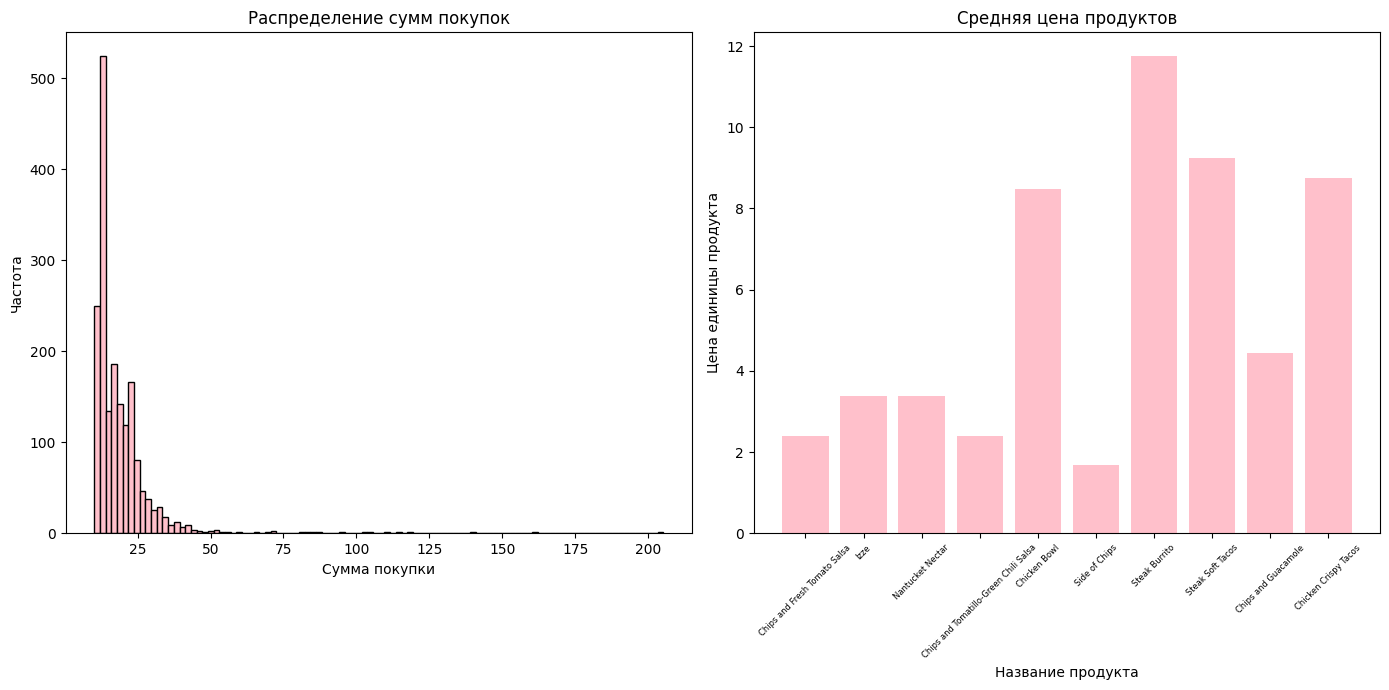

In [106]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(df_14['check_sum'], bins=100, color='pink', edgecolor='black')
plt.xlabel('Сумма покупки')
plt.ylabel('Частота')
plt.title('Распределение сумм покупок')

plt.subplot(1, 2, 2)
plt.bar(df_14_1['item_name'][:10], df_14_1['singular_item_price'][:10], color='pink')
plt.xlabel('Название продукта')
plt.xticks(rotation=45, fontsize = 6)
plt.ylabel('Цена единицы продукта')
plt.title('Средняя цена продуктов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 15. Постройте график зависимости суммы покупок от дней.

In [99]:
df_15 = df_14
df_15.head()

,order_id,quantity,item_name,choice_description,item_price_float,date,check_sum
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-14,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-09,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,2018-01-06,12.67
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,2018-01-03,21.00
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,2018-01-10,13.70


In [101]:
df_15['daily_rev'] = df_15.groupby('date')['check_sum'].transform(lambda p: p.sum())
df_15.head()

,order_id,quantity,item_name,choice_description,item_price_float,date,check_sum,daily_rev
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-14,11.56,1233.68
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-09,16.98,1207.01
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,2018-01-06,12.67,1112.83
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,2018-01-03,21.00,1100.60
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,2018-01-10,13.70,1100.77


In [102]:
df_15 = df_15.drop_duplicates('date')
df_15.head()

,order_id,quantity,item_name,choice_description,item_price_float,date,check_sum,daily_rev
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-14,11.56,1233.68
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-09,16.98,1207.01
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,2018-01-06,12.67,1112.83
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,2018-01-03,21.00,1100.60
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,2018-01-10,13.70,1100.77


In [103]:
df_15['day'] = df['date'].apply(lambda s: int(s[8::]))
df_15 = df_15.sort_values('day', axis=0)
df_15 = df_15.drop('choice_description', axis = 1)
df_15.head()

,order_id,quantity,item_name,item_price_float,date,check_sum,daily_rev,day
13,7,1,Chicken Bowl,11.25,2018-01-01,15.70,1054.56,1
29,15,1,Chicken Burrito,8.49,2018-01-02,10.88,1257.59,2
7,4,1,Steak Burrito,11.75,2018-01-03,21.00,1100.60,3
159,72,1,Chicken Burrito,10.98,2018-01-04,10.98,1156.78,4
23,12,1,Chicken Burrito,10.98,2018-01-05,14.37,1384.02,5


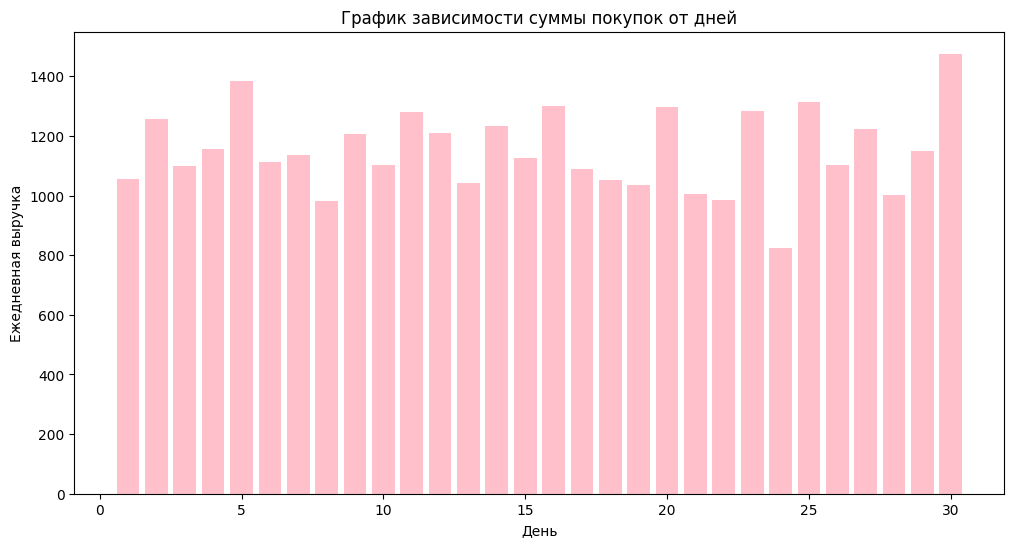

In [123]:
plt.figure(figsize=(12, 6))

plt.bar(df_15['day'], df_15['daily_rev'], color='pink')
plt.xlabel('День')
plt.ylabel('Ежедневная выручка')
plt.title('График зависимости суммы покупок от дней')

plt.show()

### 16. Постройте средних сумм покупок по дням недели (bar plot).

In [111]:
df_16 = df
df_16['day'] = df['date'].apply(lambda s: int(s[8::]))
df_16 = df_16.sort_values('day', axis=0)
df_16 = df_16.drop('choice_description', axis = 1)
df_16.head()

,order_id,quantity,item_name,item_price_float,date,check_sum,day
2233,900,1,Carnitas Bowl,11.48,2018-01-01,20.47,1
2927,1164,1,Chips and Guacamole,3.99,2018-01-01,12.98,1
1693,686,1,Chicken Bowl,8.49,2018-01-01,16.98,1
2926,1164,1,Carnitas Bowl,8.99,2018-01-01,12.98,1
1688,683,1,Canned Soft Drink,1.35,2018-01-01,12.25,1


In [112]:
df_16['mod'] = df_16['day'] % 7
df_16.head()

,order_id,quantity,item_name,item_price_float,date,check_sum,day,mod
2233,900,1,Carnitas Bowl,11.48,2018-01-01,20.47,1,1
2927,1164,1,Chips and Guacamole,3.99,2018-01-01,12.98,1,1
1693,686,1,Chicken Bowl,8.49,2018-01-01,16.98,1,1
2926,1164,1,Carnitas Bowl,8.99,2018-01-01,12.98,1,1
1688,683,1,Canned Soft Drink,1.35,2018-01-01,12.25,1,1


In [113]:
days_dict = {1: 'Понедельник', 2: 'Вторник', 3: 'Среда', 4: 'Четверг', 5: 'Пятница', 6: 'Суббота', 0: 'Воскресенье'}

df_16['day_name'] = df_16['mod'].map(days_dict)
df_16.head()

,order_id,quantity,item_name,item_price_float,date,check_sum,day,mod,day_name
2233,900,1,Carnitas Bowl,11.48,2018-01-01,20.47,1,1,Понедельник
2927,1164,1,Chips and Guacamole,3.99,2018-01-01,12.98,1,1,Понедельник
1693,686,1,Chicken Bowl,8.49,2018-01-01,16.98,1,1,Понедельник
2926,1164,1,Carnitas Bowl,8.99,2018-01-01,12.98,1,1,Понедельник
1688,683,1,Canned Soft Drink,1.35,2018-01-01,12.25,1,1,Понедельник


In [114]:
mean_check_sum = df_16.groupby('day_name')['check_sum'].mean()
df_16 = df_16.merge(mean_check_sum, on='day_name', suffixes=('', '_mean'))
df_16

,order_id,quantity,item_name,item_price_float,date,check_sum,day,mod,day_name,check_sum_mean
0,900,1,Carnitas Bowl,11.48,2018-01-01,20.47,1,1,Понедельник,21.544434
1,1164,1,Chips and Guacamole,3.99,2018-01-01,12.98,1,1,Понедельник,21.544434
2,686,1,Chicken Bowl,8.49,2018-01-01,16.98,1,1,Понедельник,21.544434
3,1164,1,Carnitas Bowl,8.99,2018-01-01,12.98,1,1,Понедельник,21.544434
4,683,1,Canned Soft Drink,1.35,2018-01-01,12.25,1,1,Понедельник,21.544434
...,...,...,...,...,...,...,...,...,...,...
4617,511,3,Steak Burrito,27.75,2018-01-30,104.59,30,2,Вторник,25.499255
4618,511,1,Veggie Burrito,8.75,2018-01-30,104.59,30,2,Вторник,25.499255
4619,511,4,Chips and Fresh Tomato Salsa,11.80,2018-01-30,104.59,30,2,Вторник,25.499255
4620,497,1,Chips and Guacamole,4.45,2018-01-30,21.95,30,2,Вторник,25.499255


In [115]:
df_16 = df_16.drop_duplicates('day_name')
df_16

,order_id,quantity,item_name,item_price_float,date,check_sum,day,mod,day_name,check_sum_mean
0,900,1,Carnitas Bowl,11.48,2018-01-01,20.47,1,1,Понедельник,21.544434
141,1534,1,Chicken Burrito,8.75,2018-01-02,29.25,2,2,Вторник,25.499255
312,508,1,Chips and Fresh Tomato Salsa,2.39,2018-01-03,11.38,3,3,Среда,23.373052
460,225,1,Carnitas Bowl,9.25,2018-01-04,25.80,4,4,Четверг,22.017909
621,1040,1,Chicken Burrito,8.49,2018-01-05,11.88,5,5,Пятница,21.079046
790,1433,1,Chicken Burrito,8.49,2018-01-06,22.76,6,6,Суббота,27.860516
933,993,1,Side of Chips,1.69,2018-01-07,10.18,7,0,Воскресенье,20.499251


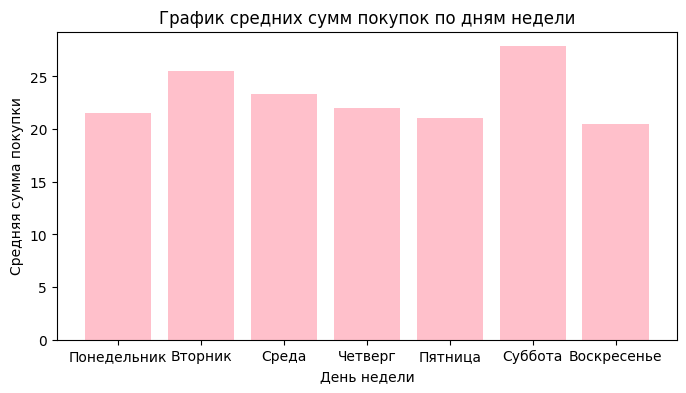

In [117]:
plt.figure(figsize=(8, 4))

plt.bar(df_16['day_name'], df_16['check_sum_mean'], color='pink')
plt.xlabel('День недели')
plt.ylabel('Средняя сумма покупки')
plt.title('График средних сумм покупок по дням недели')

plt.show()

### 17. Постройте график зависимости денег за товар от купленного количества (scatter plot).

In [119]:
df_17 = df
df_17 = df_17.drop('choice_description', axis = 1)
df_17

,order_id,quantity,item_name,item_price_float,date,check_sum,day
0,1,1,Chips and Fresh Tomato Salsa,2.39,2018-01-14,11.56,14
1,1,1,Izze,3.39,2018-01-14,11.56,14
2,1,1,Nantucket Nectar,3.39,2018-01-14,11.56,14
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39,2018-01-14,11.56,14
4,2,2,Chicken Bowl,16.98,2018-01-09,16.98,9
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,11.75,2018-01-29,23.50,29
4618,1833,1,Steak Burrito,11.75,2018-01-29,23.50,29
4619,1834,1,Chicken Salad Bowl,11.25,2018-01-20,28.75,20
4620,1834,1,Chicken Salad Bowl,8.75,2018-01-20,28.75,20


In [120]:
all_time_quantity = df_17.groupby('item_name')['quantity'].sum()
df_17 = df_17.merge(all_time_quantity, on='item_name')
df_17 = df_17.drop_duplicates('item_name')
df_17.head()

,order_id,quantity_x,item_name,item_price_float,date,check_sum,day,quantity_y
0,1,1,Chips and Fresh Tomato Salsa,2.39,2018-01-14,11.56,14,130
1,1,1,Izze,3.39,2018-01-14,11.56,14,20
2,1,1,Nantucket Nectar,3.39,2018-01-14,11.56,14,29
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39,2018-01-14,11.56,14,33
4,2,2,Chicken Bowl,16.98,2018-01-09,16.98,9,761


In [121]:
df_17['singular_item_price'] = df_17['item_price_float'] / df_17['quantity_x']
df_17 = df_17.sort_values('singular_item_price', axis=0)
df_17.head()

,order_id,quantity_x,item_name,item_price_float,date,check_sum,day,quantity_y,singular_item_price
34,17,1,Bottled Water,1.09,2018-01-08,10.08,8,211,1.09
18,9,2,Canned Soda,2.18,2018-01-30,10.67,30,126,1.09
263,114,1,Canned Soft Drink,1.25,2018-01-14,13.00,14,351,1.25
6,3,1,Side of Chips,1.69,2018-01-06,12.67,6,110,1.69
40,19,1,Chips,2.15,2018-01-20,13.90,20,230,2.15


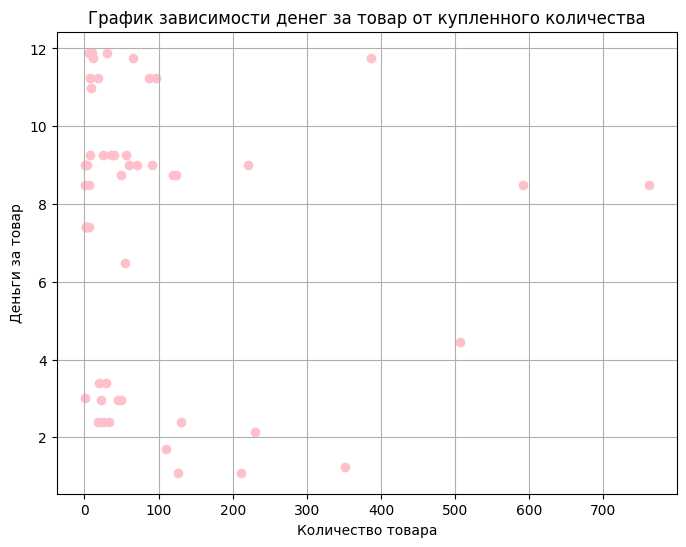

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(df_17['quantity_y'], df_17['singular_item_price'], color='pink', marker='o')
plt.xlabel('Количество товара')
plt.ylabel('Деньги за товар')
plt.title('График зависимости денег за товар от купленного количества')

plt.grid(True)
plt.show()

### 18. Сохраните график в формате pdf (так он останется векторизованным).

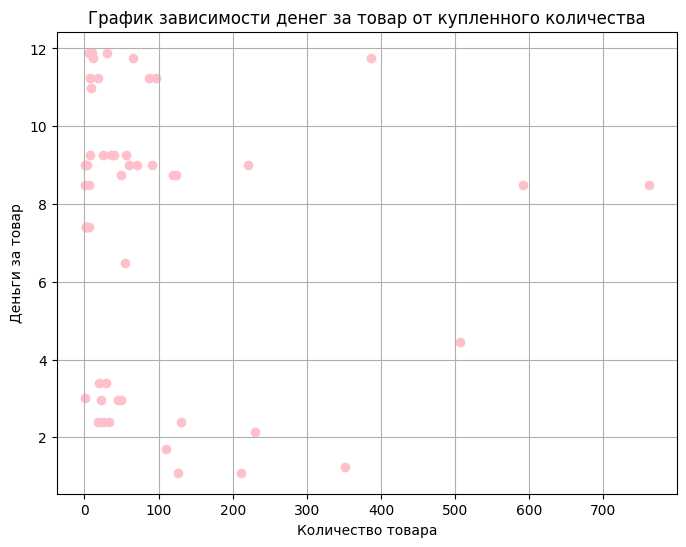

In [125]:
plt.figure(figsize=(8, 6))
plt.scatter(df_17['quantity_y'], df_17['singular_item_price'], color='pink', marker='o')
plt.xlabel('Количество товара')
plt.ylabel('Деньги за товар')
plt.title('График зависимости денег за товар от купленного количества')

plt.grid(True)

plt.savefig('scatter_plot.pdf', format='pdf')

plt.show()